**1. EXTRACTING DATA FROM KAGGLE SPOTIFY DATASET AND CLEANING THE DATASET**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns #used for EDA
import matplotlib.pyplot as plt #For Plotting graphs
from matplotlib import rcParams #deault styles and ensuring consistent plots
from sklearn.decomposition import PCA 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from itertools import product
import time
%matplotlib inline 

In [2]:
from google.colab import files
uploaded=files.upload()

Saving genres_v2.csv to genres_v2.csv


In [3]:
df=pd.read_csv('genres_v2.csv')

<ipython-input-3-d8d6a9e694b0>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('genres_v2.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [6]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in dataset.\n')

There are 42305 rows and 22 columns in dataset.



In [7]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [8]:
df = df.drop(columns=['title', 'Unnamed: 0', 'id', 'uri', 'track_href', 'analysis_url'])

In [9]:
df=df.drop_duplicates()

In [10]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in dataset.\n')

There are 38165 rows and 16 columns in dataset.



In [11]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
duration_ms             0
time_signature          0
genre                   0
song_name           17084
dtype: int64

**2. PREPROCESSING THE DATASET**

In [12]:
# Creating a new dataframe with required features
df_x = df[df.columns[:11]]
df_x.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988


In [13]:
df_new = df_x.copy()
df_new['genre'] = df['genre']
df_new['time_signature'] = df['time_signature']
df_new['duration_ms'] = df['duration_ms']
df_new.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,time_signature,duration_ms
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,Dark Trap,4,124539
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,Dark Trap,4,224427
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,Dark Trap,4,98821
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,Dark Trap,3,123661
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,Dark Trap,4,123298


In [14]:
df_new['duration_min'] = df_new['duration_ms']/60000
df_new.drop('duration_ms',axis=1,inplace=True)

In [15]:
df_new

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,time_signature,duration_min
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,Dark Trap,4,2.075650
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,Dark Trap,4,3.740450
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,Dark Trap,4,1.647017
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,Dark Trap,3,2.061017
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,Dark Trap,4,2.054967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,0.502,0.991,5,-4.333,0,0.2400,0.005540,0.000198,0.4700,0.0797,150.029,hardstyle,4,3.333333
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,hardstyle,4,4.486800
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,hardstyle,4,3.913717
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,hardstyle,4,5.386667


In [17]:
from sklearn.preprocessing import LabelEncoder
df2Corr = df_new.copy()
df2Corr['genre'] = LabelEncoder().fit_transform(df2Corr['genre'])
corrMx = df2Corr.corr()
corrMx.style.background_gradient(cmap = "RdBu_r")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,time_signature,duration_min
danceability,1.000000,-0.321428,-0.016433,-0.194027,0.074999,0.196465,0.065747,-0.096822,-0.196091,0.355751,-0.143740,-0.051019,0.058360,-0.068326
energy,-0.321428,1.000000,0.046879,0.598252,-0.029434,-0.150833,-0.491719,0.312258,0.235718,-0.006390,-0.024401,0.454330,0.039390,0.305150
key,-0.016433,0.046879,1.000000,-0.004615,-0.249584,-0.028919,-0.004163,0.067623,0.001323,0.025907,-0.007565,0.027895,0.007587,0.068717
loudness,-0.194027,0.598252,-0.004615,1.000000,0.001099,0.037581,-0.280425,-0.179991,0.163773,0.102673,0.139954,0.132334,0.045738,-0.082652
mode,0.074999,-0.029434,-0.249584,0.001099,1.000000,0.047462,-0.016273,-0.021803,0.011290,0.014947,-0.006323,-0.022463,-0.009587,-0.036733
speechiness,0.196465,-0.150833,-0.028919,0.037581,0.047462,1.000000,0.158272,-0.389221,0.052209,0.239759,0.166151,-0.153032,0.023291,-0.311190
acousticness,0.065747,-0.491719,-0.004163,-0.280425,-0.016273,0.158272,1.000000,-0.261954,-0.109839,0.101296,0.051668,-0.342175,-0.048757,-0.246822
instrumentalness,-0.096822,0.312258,0.067623,-0.179991,-0.021803,-0.389221,-0.261954,1.000000,-0.007648,-0.280526,-0.200685,0.428359,-0.011786,0.604687
liveness,-0.196091,0.235718,0.001323,0.163773,0.011290,0.052209,-0.109839,-0.007648,1.000000,-0.016906,0.025073,0.106962,0.002954,0.016078
valence,0.355751,-0.006390,0.025907,0.102673,0.014947,0.239759,0.101296,-0.280526,-0.016906,1.000000,0.083962,-0.176225,0.042049,-0.193279


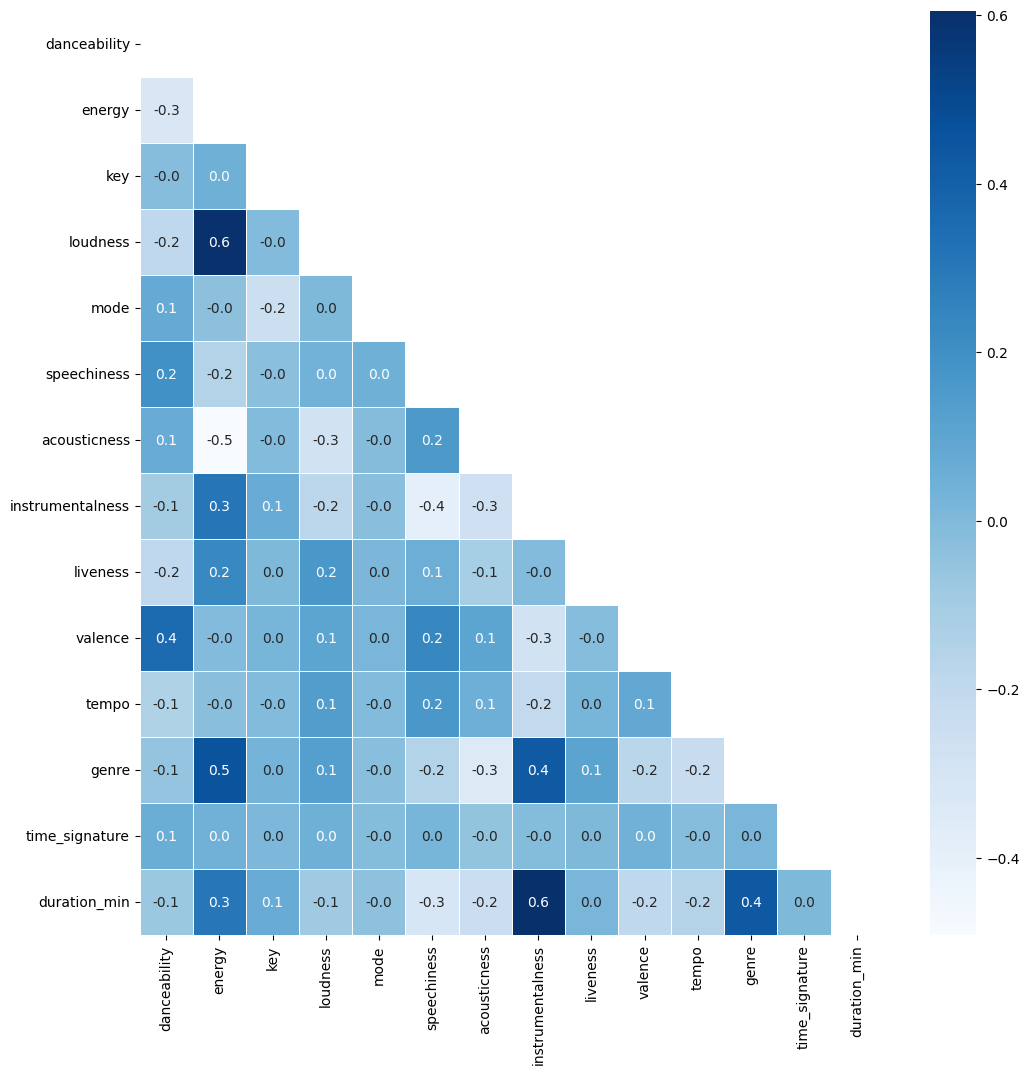

In [18]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df2Corr.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df2Corr.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
df_new['genre_enco'] = LabelEncoder().fit_transform(df_new['genre'])
df_new['genre_enco'].value_counts()

7     5776
0     4522
2     2964
13    2734
12    2632
10    2610
8     2407
9     2277
14    2226
11    2192
5     2043
6     1910
4     1812
1     1608
3      452
Name: genre_enco, dtype: int64

In [20]:
X1 = df_new.drop(columns=['genre','genre_enco'])
Y1 = df_new["genre_enco"]
print(X1.shape)

(38165, 13)


In [21]:
# feature scaling and normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
X1_std = StandardScaler().fit_transform(X1)

**SMOTE**

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X1, Y1 = smote.fit_resample(X1_std, Y1)
print(X1.shape)

(86640, 13)


**3. EDA**

In [23]:
print(f"Number of genres in given dataset: {len(df['genre'].unique())}\n")

df["genre"].unique()

Number of genres in given dataset: 15



array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [24]:
df['genre'].value_counts()

Underground Rap    5776
Dark Trap          4522
Hiphop             2964
trance             2734
techno             2632
psytrance          2610
dnb                2407
hardstyle          2277
trap               2226
techhouse          2192
RnB                2043
Trap Metal         1910
Rap                1812
Emo                1608
Pop                 452
Name: genre, dtype: int64

In [25]:
# Count of each genre
import plotly.express as px
px.histogram(df.genre)

In [26]:
# Top 10 genre pie chart
df_genre = df['genre'].value_counts().head(10)

fig = px.pie(df_genre, names=df_genre.index, values=df_genre.values, title='Distribution of popular genre', labels=df_genre.index)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



**4. MODEL (BUILDING AND TRAINING MODELS USING ML ALGORITHMS)**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=.2, random_state=1, shuffle=True)

In [28]:
print(X_train.shape)
print(X_test.shape)

(69312, 13)
(17328, 13)


In [29]:
scoring = [['model','accuracy']]

In [30]:
def buildModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # train model
    yhat = model.predict(X_test) # predict
    score = accuracy_score(y_test, yhat)
    return {
      "predict": yhat,
      "accuracy": score
    }

In [31]:
def modelCrossValidation(X, Y, algo):
    validation = KFold(n_splits=5, shuffle=True, random_state=1)
    statsNames = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'f1_macro']

    res = {}
    for sname in statsNames:
        res[sname] = round(cross_val_score(algo, X, Y, cv=validation, scoring=sname, n_jobs=-1).mean(), 4)
    return res

## *FEATURE IMPORTANCE*

[0.07930963 0.05183612 0.03172549 0.05644063 0.0361679  0.0514685
 0.03827234 0.17879705 0.02195764 0.05441793 0.23340869 0.03095873
 0.13523936]


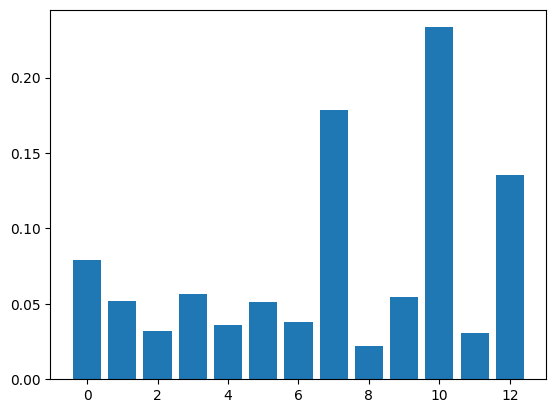

In [32]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# feature importance
print(model.feature_importances_)

# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

**4.a NAIVE BAYES**

In [33]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
res_NB = buildModel(model_NB, X_train, X_test, y_train, y_test)
print(res_NB["accuracy"])
scoring.append(['Naive Bayes', res_NB["accuracy"]])

0.5851800554016621


**4.b K-Nearest Neighbors**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=4) # n_neighbors=3
res_KNN = buildModel(model_KNN, X_train, X_test, y_train, y_test)

scoring.append(['KNeighbors', res_KNN["accuracy"]])
scoring[1]

['Naive Bayes', 0.5851800554016621]

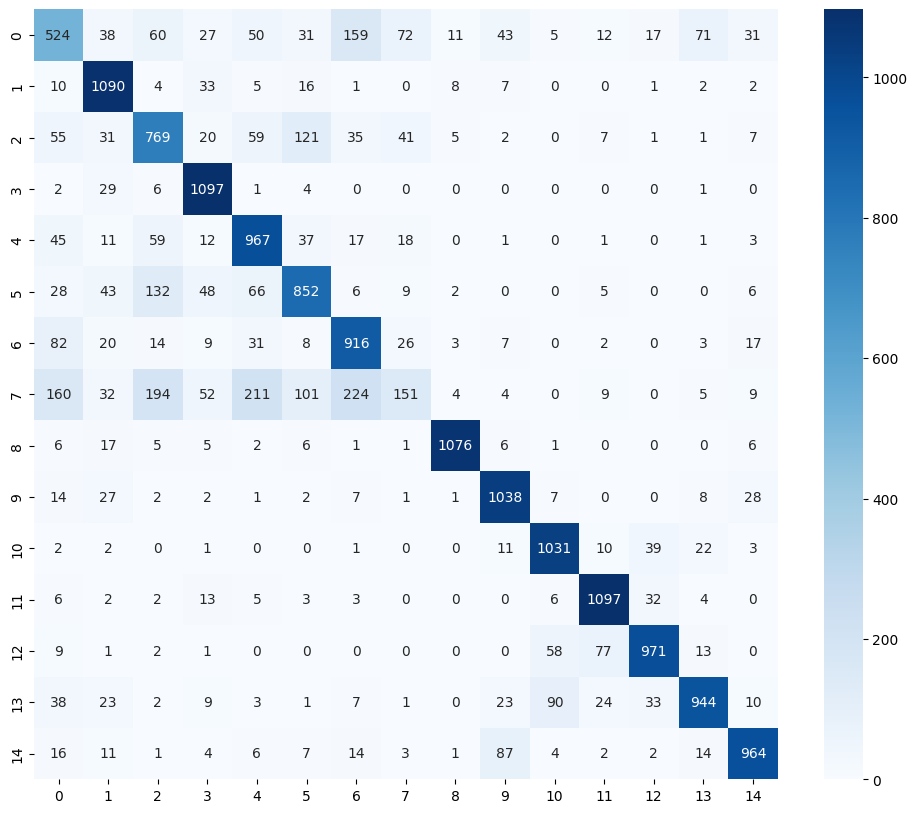

In [35]:
cm = confusion_matrix(y_test, res_KNN['predict'])
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

**4.c DECISION TREE**

In [36]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)
res_DT = buildModel(model_DT, X_train, X_test, y_train, y_test)
print(res_DT["accuracy"])
scoring.append(['Decision Tree', res_DT["accuracy"]])

0.6402931671283472


In [37]:
# get importance
importance = model_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08723
Feature: 1, Score: 0.05840
Feature: 2, Score: 0.00199
Feature: 3, Score: 0.04847
Feature: 4, Score: 0.00010
Feature: 5, Score: 0.04186
Feature: 6, Score: 0.01573
Feature: 7, Score: 0.09031
Feature: 8, Score: 0.00625
Feature: 9, Score: 0.04689
Feature: 10, Score: 0.44922
Feature: 11, Score: 0.00017
Feature: 12, Score: 0.15339


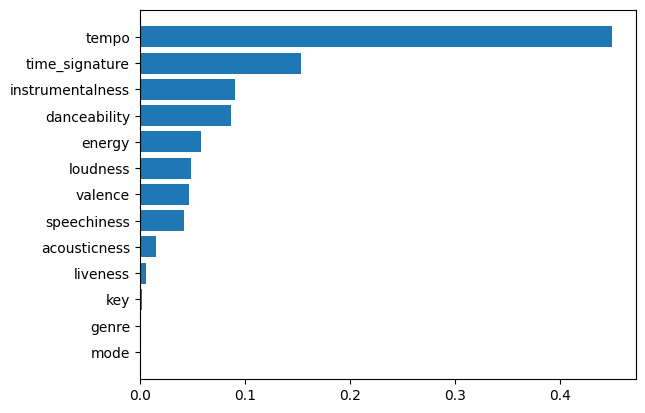

In [38]:
# plotting feature importance
indices = np.argsort(importance)

fig, ax = plt.subplots()
ax.barh(range(len(importance)), importance[indices])
ax.set_yticks(range(len(importance)))
_ = ax.set_yticklabels(np.array(df_new.columns)[indices])


**4.d RANDOM FOREST**

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Train Accuracy 
k = 5
model_RF = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=3)
cv_score = cross_val_score(model_RF, X_train, y_train, cv=k)
print('Cross_val Scores: ', cv_score)
print("Train Accuracy(average):", cv_score.mean())

# Test Accuracy
clf_RF = model_RF.fit(X_train, y_train)
y_pred = clf_RF.predict(X_test)
score_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", score_accuracy)
scoring.append(['RandomForest', score_accuracy])

Cross_val Scores:  [0.80206305 0.79910553 0.80139951 0.79584476 0.79440196]
Train Accuracy(average): 0.7985629610650955
Test Accuracy: 0.8101915974145891


Feature: 0, Score: 0.09544
Feature: 1, Score: 0.07621
Feature: 2, Score: 0.03593
Feature: 3, Score: 0.08141
Feature: 4, Score: 0.01083
Feature: 5, Score: 0.07072
Feature: 6, Score: 0.06672
Feature: 7, Score: 0.09569
Feature: 8, Score: 0.05106
Feature: 9, Score: 0.07104
Feature: 10, Score: 0.21343
Feature: 11, Score: 0.00393
Feature: 12, Score: 0.12759


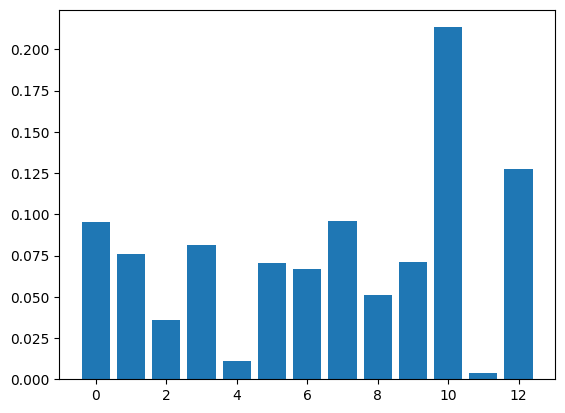

In [40]:
# get importance
importance = model_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

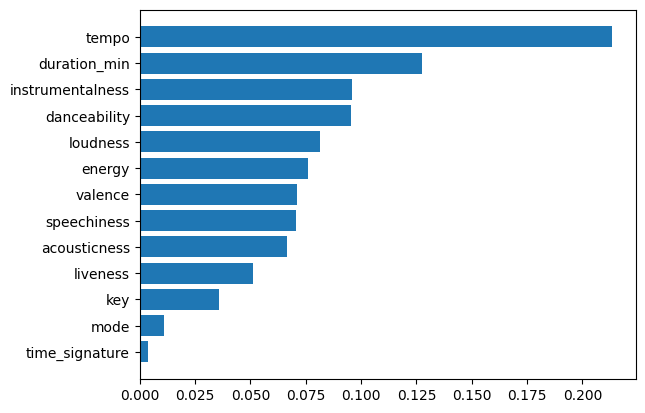

In [41]:
indices = np.argsort(importance)

fig, ax = plt.subplots()
ax.barh(range(len(importance)), importance[indices])
ax.set_yticks(range(len(importance)))
_ = ax.set_yticklabels(np.array(df_new.drop(columns=['genre','genre_enco']).columns)[indices])

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55      1151
           1       0.89      0.92      0.91      1179
           2       0.66      0.62      0.64      1154
           3       0.89      0.95      0.92      1140
           4       0.73      0.79      0.76      1172
           5       0.73      0.75      0.74      1197
           6       0.65      0.73      0.69      1138
           7       0.37      0.31      0.33      1156
           8       0.98      0.99      0.99      1132
           9       0.93      0.95      0.94      1138
          10       0.95      0.96      0.96      1122
          11       0.93      0.94      0.94      1173
          12       0.93      0.91      0.92      1132
          13       0.90      0.93      0.92      1208
          14       0.90      0.91      0.91      1136

    accuracy                           0.81     17328
   macro avg       0.80      0.81      0.81     17328
weighted avg       0.80   

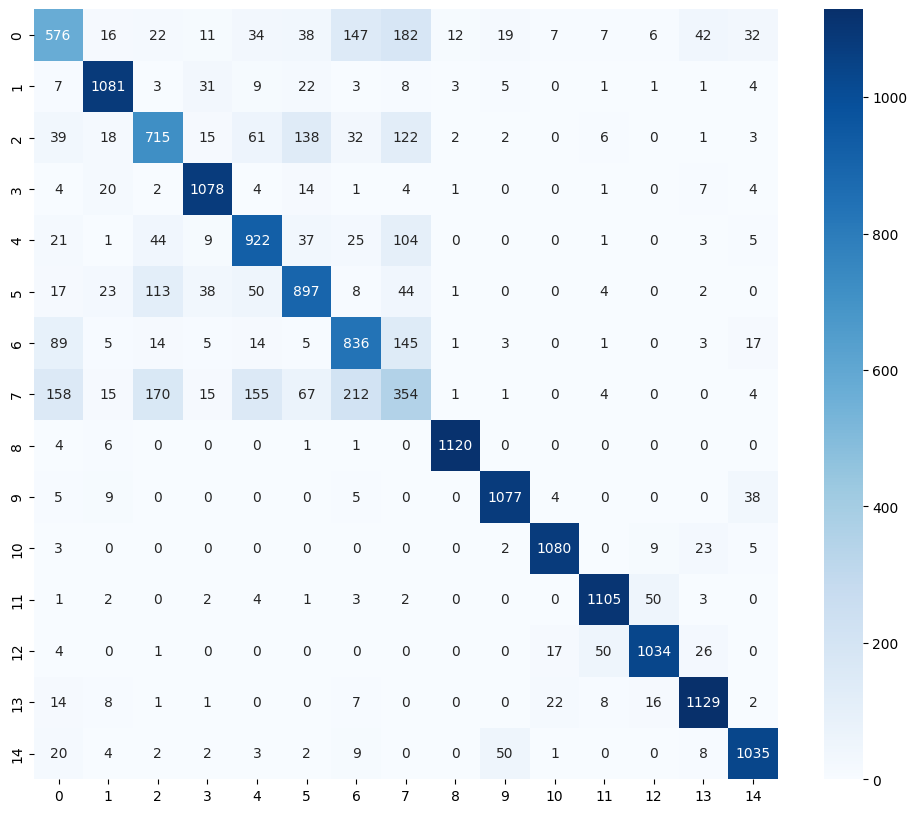

In [43]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

**4.e SVM**

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

k = 3

# Train Accuracy 
model_svc = SVC(kernel="rbf", C=1000, gamma="scale") 
cv_score = cross_val_score(model_svc, X_train, y_train, cv=k)
print('Cross_val Scores: ', cv_score)
print("Train Accuracy(average):", cv_score.mean()) 

# Test Accuracy
clf_svc = model_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)
score_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", score_accuracy)
scoring.append(['SVM', score_accuracy])

Cross_val Scores:  [0.78189924 0.78445291 0.78042763]
Train Accuracy(average): 0.7822599261311173
Test Accuracy: 0.8159626038781164


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.55      0.56      1151
           1       0.91      0.92      0.91      1179
           2       0.64      0.65      0.64      1154
           3       0.92      0.98      0.95      1140
           4       0.73      0.81      0.77      1172
           5       0.77      0.76      0.77      1197
           6       0.68      0.78      0.73      1138
           7       0.35      0.25      0.29      1156
           8       0.98      0.99      0.99      1132
           9       0.93      0.94      0.93      1138
          10       0.96      0.95      0.95      1122
          11       0.94      0.94      0.94      1173
          12       0.92      0.92      0.92      1132
          13       0.93      0.90      0.92      1208
          14       0.92      0.91      0.91      1136

    accuracy                           0.82     17328
   macro avg       0.81      0.82      0.81     17328
weighted avg       0.81   

**4.f BAGGING**

In [46]:
from sklearn.ensemble import BaggingClassifier
k = 5

# Train Accuracy 
model_Bag = BaggingClassifier()
cv_score = cross_val_score(model_Bag, X_train, y_train, cv=k)
print('Cross_val Scores: ', cv_score)
print("Train Accuracy(average):", cv_score.mean()) 

# Test Accuracy
clf_bag = model_Bag.fit(X_train, y_train)
y_pred = clf_bag.predict(X_test)
score_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", score_accuracy)
scoring.append(['Bagging', score_accuracy])

Cross_val Scores:  [0.75164106 0.75156892 0.74989179 0.74347136 0.74866542]
Train Accuracy(average): 0.7490477101430759
Test Accuracy: 0.7587142197599261


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48      1151
           1       0.82      0.87      0.84      1179
           2       0.55      0.56      0.56      1154
           3       0.81      0.89      0.85      1140
           4       0.67      0.71      0.69      1172
           5       0.68      0.63      0.65      1197
           6       0.59      0.64      0.62      1138
           7       0.29      0.24      0.26      1156
           8       0.98      0.97      0.97      1132
           9       0.89      0.93      0.91      1138
          10       0.95      0.95      0.95      1122
          11       0.91      0.92      0.92      1173
          12       0.89      0.89      0.89      1132
          13       0.89      0.89      0.89      1208
          14       0.89      0.84      0.86      1136

    accuracy                           0.76     17328
   macro avg       0.75      0.76      0.76     17328
weighted avg       0.75   

**4.g Logistic Regression**

In [48]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(max_iter=1000);
res_LR = buildModel(model_LR, X_train, X_test, y_train, y_test)

print(res_LR["accuracy"])
scoring.append(['Logistic Regression', res_LR["accuracy"]])

0.5839681440443213


**5. COMPARING THE RESULTS OF DIFFERENT ALGORITHMS APPLIED**

In [49]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = scoring[0]

for i in range(len(scoring)):
    if i!=0:
        table.add_row(scoring[i])
print(table)

+---------------------+--------------------+
|        model        |      accuracy      |
+---------------------+--------------------+
|     Naive Bayes     | 0.5851800554016621 |
|      KNeighbors     | 0.7783356417359187 |
|    Decision Tree    | 0.6402931671283472 |
|     RandomForest    | 0.8101915974145891 |
|         SVM         | 0.8159626038781164 |
|       Bagging       | 0.7587142197599261 |
| Logistic Regression | 0.5839681440443213 |
+---------------------+--------------------+


In [50]:
toChart = pd.DataFrame(scoring, columns =['algorithm', 'accuracy']) 
toChart.drop(0, inplace=True)

px.bar(toChart, x="algorithm", y="accuracy")